In [80]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

## Pre-processing and Loading

In [11]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [12]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [13]:
df.Sex = df.Sex.map({'male':0, 'female':1})
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0


In [14]:
X = df.drop(['Survived'], axis=1)
y = df.Survived

In [15]:
X.columns[X.isna().any()]

Index(['Age'], dtype='object')

In [16]:
X[:10]

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500
5,3,0,NaN,8.4583
6,1,0,54.0,51.8625
7,3,0,2.0,21.0750
8,3,1,27.0,11.1333
9,2,1,14.0,30.0708


In [17]:
X.Age = X.Age.fillna(np.int_(X.Age.mean()))
X[:10]

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500
5,3,0,29.0,8.4583
6,1,0,54.0,51.8625
7,3,0,2.0,21.0750
8,3,1,27.0,11.1333
9,2,1,14.0,30.0708


## Visualizing Data

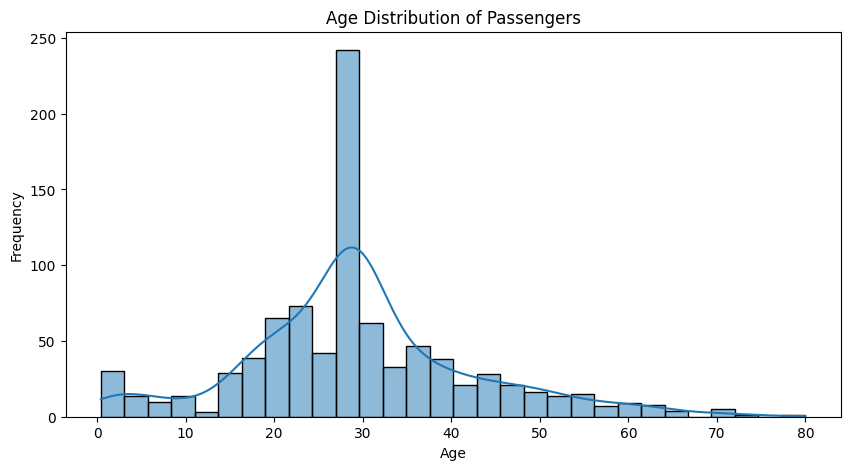

In [85]:
plt.figure(figsize=(10, 5))
sns.histplot(X['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.ylabel('Frequency')
plt.show()

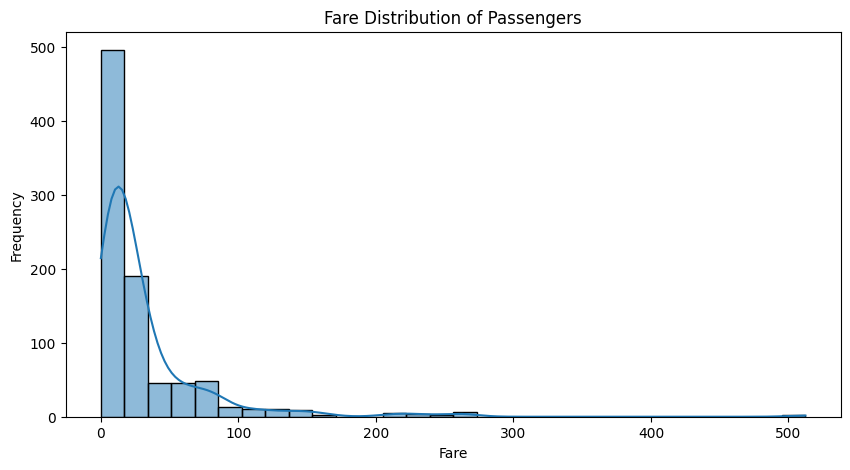

In [86]:
plt.figure(figsize=(10, 5))
sns.histplot(X['Fare'], bins=30, kde=True)
plt.title('Fare Distribution of Passengers')
plt.ylabel('Frequency')
plt.show()

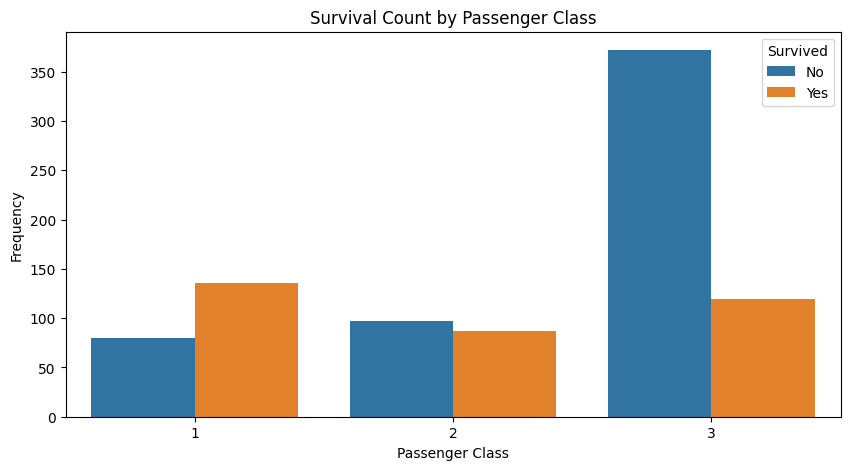

In [88]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Frequency')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

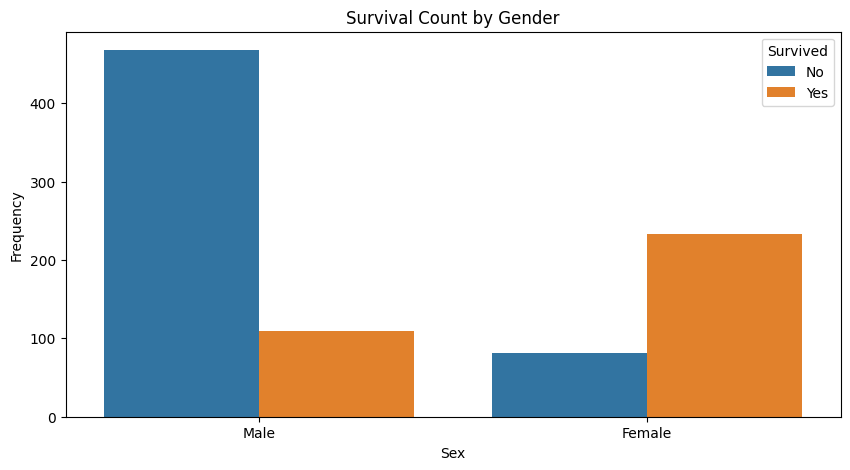

In [109]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Frequency')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

## Model

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [69]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [70]:
model.score(X_test, y_test)

0.8156424581005587

In [74]:
y_pred = model.predict(X_test)

## Results

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.85       119
           1       0.69      0.82      0.75        60

    accuracy                           0.82       179
   macro avg       0.79      0.82      0.80       179
weighted avg       0.83      0.82      0.82       179



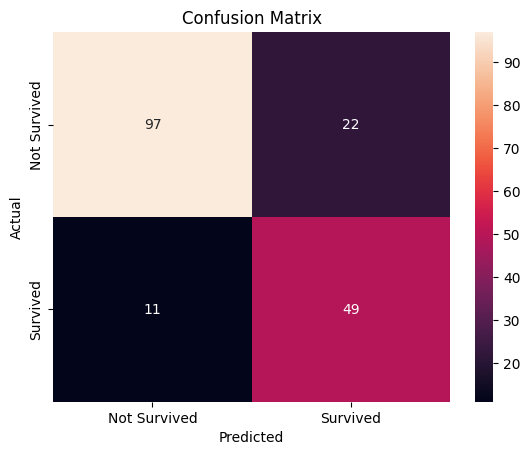

In [98]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()